<a href="https://colab.research.google.com/github/shreyasbhojane10/Artificial-Intelligence/blob/main/Sentiment_Analysis_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification for Sentiment Analysis
Read the dataset - Reviews of Restaurants

In [1]:
path = r"https://raw.githubusercontent.com/shreyasbhojane10/Datasets/refs/heads/main/Restaurant_Reviews.tsv"

In [2]:
import pandas as pd
df = pd.read_csv(path, sep='\t')    # Here dataset is in .tsv format hence we use sep='\t' | .tsv means tab(space bet review and like)

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Data Preprocessing : 1) Convert the data into lower case.
#                       2) Remove the unimportant content like punctuation marks(?!.) and special characteres(@#$%)

In [4]:
df['Review']

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
995,I think food should have flavor and texture an...
996,Appetite instantly gone.
997,Overall I was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ..."


first we do Data Preprocessing on one line then will do for all

In [5]:
df['Review'][0]

'Wow... Loved this place.'

In [6]:
# step1 (converting into lower case)
text = df['Review'][0].lower()
text

'wow... loved this place.'

In [7]:
# step 2 (removing special caracters)
import re                          # Reguler Expression from python
pattern = r"[^a-z ]"               # anything otherthan a to z and 'space' i.e. removing (@#$%)
re.sub(pattern,"",text)            # re.sub(identify mentioned patter , space, text) python ka format

'wow loved this place'

In [8]:
txt2 = "This isn't the correct way to do so...!!!"

In [9]:
re.sub(pattern,"",txt2)

'his isnt the correct way to do so'

Now, this we have done on our text. To apply this on our dataset we will define a function: preprocess_text

In [10]:
def preprocess_text(text):
  # Convert the text into lower case
  text_new = text.lower()

  # replace the special characters with blank string
  pattern = r"[^a-z ]"
  text_updated = re.sub(pattern,"",text_new)
  return text_updated

In [11]:
df["Preprocessed Review"] = df["Review"].apply(preprocess_text)
df["Preprocessed Review"]

,Preprocessed Review
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...
...,...
995,i think food should have flavor and texture an...
996,appetite instantly gone
997,overall i was not impressed and would not go back
998,the whole experience was underwhelming and i t...


In [12]:
df.head()       # Now 'preprocess_text' is a new column added in dataset

,Review,Liked,Preprocessed Review
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


# Separate X and Y features

In [13]:
X = df["Preprocessed Review"]
Y = df["Liked"]

In [14]:
X.head()

,Preprocessed Review
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


In [15]:
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


# TFIDF: Tokenization

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer()
xpre = tfidf.fit_transform(X).toarray()          # To get output in array format-> .toarray()
xpre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
xpre[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
xpre.shape

(1000, 2046)

#Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xpre,Y,train_size=0.8,random_state=42)

In [23]:
xtrain.shape

(200, 2046)

In [25]:
xtest.shape

(200, 2046)

# Build the Neural Network

In [26]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [27]:
model = Sequential()

In [31]:
model =  Sequential()
# Input layer
model.add(Input(shape=(xtrain.shape[1],)))         # (xtrain.shape[1],{',' is imp here for conversion}) -> (200, 2046)
# Hidden layer 1
model.add(Dense(units=64,activation="relu"))       # units(Neurons) = 64(64 taken randomly)
model.add(Dropout(rate=0.2))
# Hidden layer 2
model.add(Dense(units=32,activation="relu"))       # units=32(reduces neurons in second layer)
model.add(Dropout(rate=0.1))
# Output layer
model.add(Dense(units=1,activation="sigmoid"))

In [32]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │       131,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,121 (520.00 KB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [34]:
es = EarlyStopping(monitor="val_loss",patience=10)

In [35]:
hist = model.fit(xtrain,ytrain,validation_split=0.1,epochs=15,callbacks=[es])

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.5007 - loss: 0.6928 - val_accuracy: 0.6000 - val_loss: 0.6913
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7551 - loss: 0.6779 - val_accuracy: 0.7125 - val_loss: 0.6800
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8957 - loss: 0.6357 - val_accuracy: 0.8250 - val_loss: 0.6396
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9401 - loss: 0.5262 - val_accuracy: 0.7625 - val_loss: 0.5726
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9498 - loss: 0.3487 - val_accuracy: 0.8125 - val_loss: 0.4591
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9802 - loss: 0.2049 - val_accuracy: 0.8500 - val_loss: 0.4064
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9864 - loss: 0.1109 - val_accuracy: 0.8375 - val_loss: 0.3767
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9993 - loss: 0.0598 - val_accuracy: 0.8500 - val_loss

# Evaluate the model using Learning Curve

Text(0, 0.5, 'Loss')

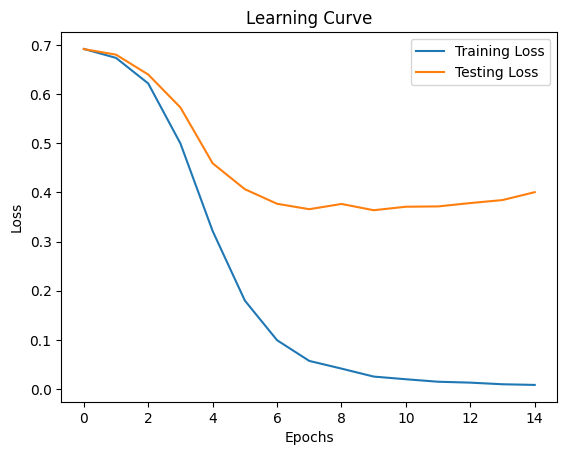

In [36]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Testing Loss")
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Testing Accuracy

Text(0, 0.5, 'accuracy')

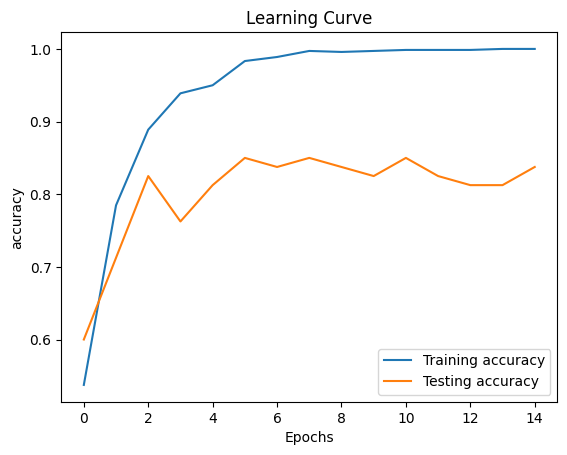

In [37]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"],label="Training accuracy")
plt.plot(hist.history["val_accuracy"],label="Testing accuracy")
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

In [38]:
model.evaluate(xtrain,ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0092 


[0.04431374371051788, 0.9837499856948853]

In [39]:
model.evaluate(xtest,ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.7809 - loss: 0.6269


[0.5855029821395874, 0.7900000214576721]

    Confusion Matrix
    Classification Report
    Model Predictions

In [40]:
review = "Food tasted great. WIll visit agAIN..!!"

In [41]:
def predict(text):
  t1 = preprocess_text(text)
  token = tfidf.transform([t1])
  probs = model.predict(token)
  return probs

In [42]:
predict(review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


array([[0.979455]], dtype=float32)

In [47]:
def predict(text):
  t1 = preprocess_text(text)
  token = tfidf.transform([t1])
  probs = model.predict(token)
  if probs>=0.5:
    return 'positive review'
  else:
    return 'negetive review'

In [48]:
predict(review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


'positive review'

saving the model

In [49]:
model.save("SentimentAnalysis.keras")

In [50]:
# If you want to pass file :
## IF your out of sample predictions are in file format, load them into dataframe
## Use the below method to predict final predictions. Assume the new data contains review_new column with new reviews
# df_new["Predictions"] = df["review_new"].apply(predict)

In [51]:
## To load the model
from keras.models import load_model
m1 = load_model('/content/SentimentAnalysis.keras')
m1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │       131,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 399,365 (1.52 MB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 266,244 (1.02 MB)